In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

## Analysis


In [31]:

df_model = pd.read_csv("../inter_data/preprocessed.csv")

In [11]:
df_model

,Unnamed: 0,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,target,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year
0,0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,0.0,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0
1,1,SIQBAL22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.000000,132.0,132.000000,132.000000,132.000000,39.0,5.82,0.0,47.0,1.0
2,2,OPA10002,Y,0.0,M,5_10L,N,Franchisee,1.0,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0
3,3,52093616,Y,0.0,M,1_5L,N,CAT,1.0,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0
4,4,SIG10103,Y,0.0,M,5_10L,N,Franchisee,1.0,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359242,359242,PIDESHNA,Y,0.0,M,5_10L,N,Franchisee,NaN,36.0,132.000000,132.0,132.000000,132.000000,132.000000,0.0,1.46,1.0,0.0,1.0
359243,359243,PRMA3411,N,0.0,M,5_10L,N,Premia,NaN,65.0,132.000000,132.0,132.000000,132.000000,132.000000,0.0,1.38,1.0,0.0,1.0
359244,359244,PUND2371,Y,0.0,M,1_5L,N,CAT,NaN,26.0,0.155906,132.0,132.000000,132.000000,132.000000,0.0,101.39,1.0,20.0,1.0
359245,359245,MMSM0103,N,0.0,M,5_10L,N,Franchisee,0.0,23.0,0.155906,132.0,132.000000,0.583019,0.418745,36600.0,3845.42,1.0,227.0,18.0


In [3]:
df_model["target"].value_counts()


0.0    269610
1.0     52002
Name: target, dtype: int64

Text(0.5, 1.0, 'income wise analysis')

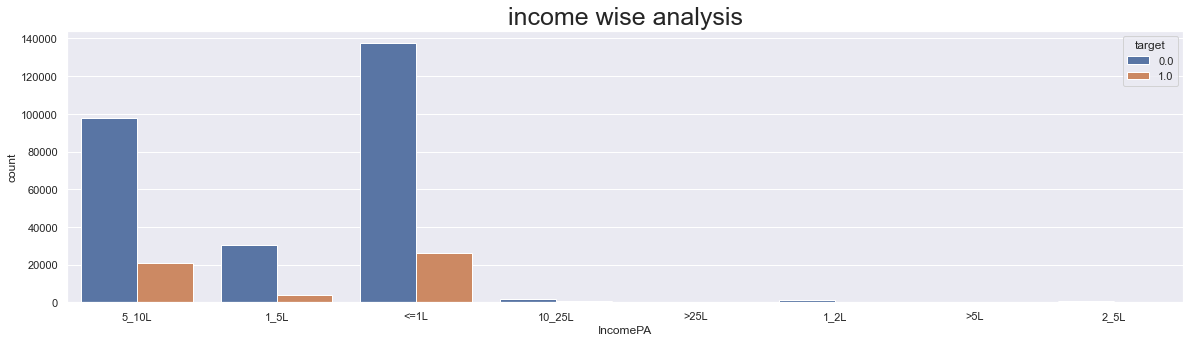

In [4]:
sns.set(rc={'figure.figsize':(20,5)})
df_model["IncomePA"] = df_model["IncomePA"].replace({"5_10L ??": "5_10L", 
                                        "<=1??": "<=1L", 
                                        "1_5??": "1_5L", "<= 1L": "<=1L"})
sns.countplot("IncomePA",data = df_model, hue = "target").set_title("income wise analysis",  fontsize=25)

In [39]:
df_test.index[0]

('10_25L', 0.0)

In [55]:
df_test = pd.DataFrame((df_model.groupby(by = ["IncomePA", "target"]).size())).rename(columns = {0: "count"})
df_test = df_test.reset_index()
df_test["perc"] = [0]*len(df_test)
flag = 0
for i in range(len(df_test)):
    if flag == 0:
        df_test.iloc[i, 3] = '{0:.2f}'.format(df_test.iloc[i, 2]/(df_test.iloc[i, 2] + df_test.iloc[i + 1, 2])* 100)  + "%"
        flag = 1        
    else:
        df_test.iloc[i, 3] = '{0:.2f}'.format(df_test.iloc[i, 2]/(df_test.iloc[i, 2] + df_test.iloc[i - 1, 2])* 100)  + "%"
        flag = 0

In [59]:
df_test

,IncomePA,target,count,perc
0,10_25L,0.0,1596,62.71%
1,10_25L,1.0,949,37.29%
2,1_2L,0.0,1275,95.79%
3,1_2L,1.0,56,4.21%
4,1_5L,0.0,30516,88.52%
5,1_5L,1.0,3959,11.48%
6,2_5L,0.0,643,96.55%
7,2_5L,1.0,23,3.45%
8,5_10L,0.0,97591,82.49%
9,5_10L,1.0,20713,17.51%


Text(0.5, 1.0, 'channel wise analysis')

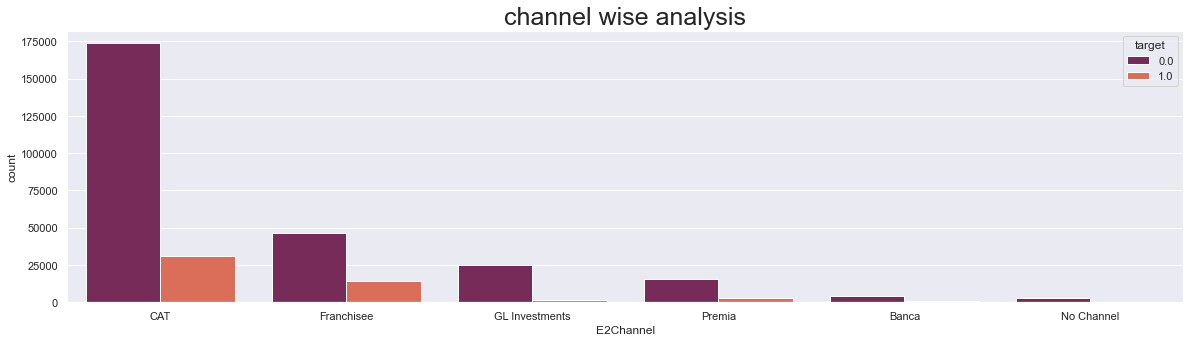

In [5]:
sns.countplot("E2Channel",data = df_model, hue = "target", 
              order = df_model["E2Channel"].value_counts().index[:6], palette = "rocket").set_title("channel wise analysis",  fontsize=25)



In [69]:
e2channels = list(df_model["E2Channel"].value_counts().index[:5])
df_model['E2Channel'].loc[~df_model['E2Channel'].isin(e2channels)] = 'others'

df_test = pd.DataFrame((df_model.groupby(by = ["E2Channel", "target"]).size())).rename(columns = {0: "count"})
df_test = df_test.reset_index()
df_test["perc"] = [0]*len(df_test)
flag = 0
for i in range(len(df_test)):
    if flag == 0:
        df_test.iloc[i, 3] = '{0:.2f}'.format(df_test.iloc[i, 2]/(df_test.iloc[i, 2] + df_test.iloc[i + 1, 2])* 100)  + "%"
        flag = 1        
    else:
        df_test.iloc[i, 3] = '{0:.2f}'.format(df_test.iloc[i, 2]/(df_test.iloc[i, 2] + df_test.iloc[i - 1, 2])* 100)  + "%"
        flag = 0
df_test

,E2Channel,target,count,perc
0,Banca,0.0,4289,86.00%
1,Banca,1.0,698,14.00%
2,CAT,0.0,173570,84.72%
3,CAT,1.0,31307,15.28%
4,Franchisee,0.0,46600,76.51%
5,Franchisee,1.0,14306,23.49%
6,GL Investments,0.0,24782,93.32%
7,GL Investments,1.0,1773,6.68%
8,Premia,0.0,15485,82.93%
9,Premia,1.0,3187,17.07%


Text(0.5, 1.0, 'channel wise analysis')

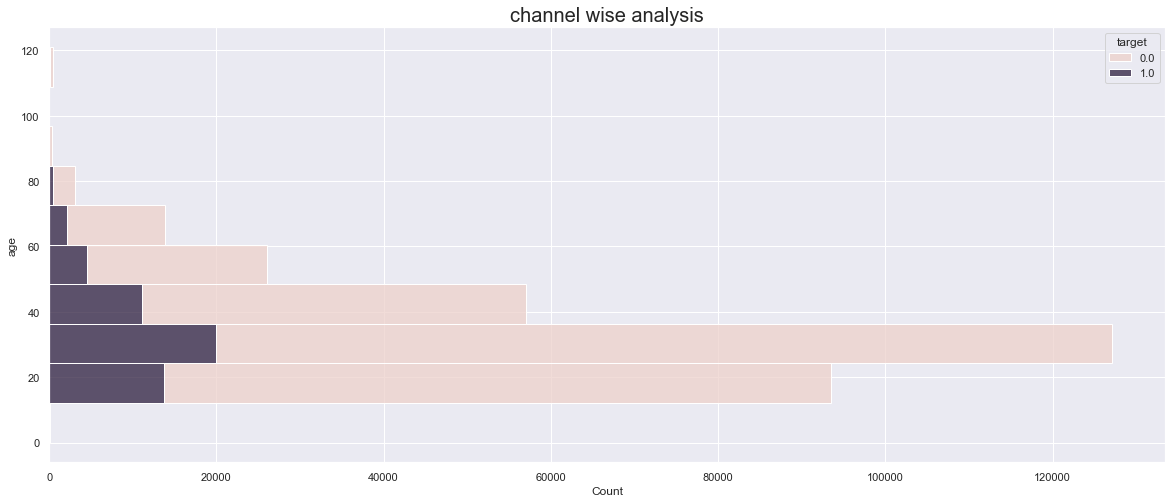

In [6]:
sns.set(rc={'figure.figsize':(20, 8)})

sns.histplot(data = df_model, y = "age", hue = "target", 
              bins = 10, multiple = "stack").set_title("channel wise analysis",  fontsize=20)


Text(0.5, 1.0, 'Distribution plot of trading clients logins in last one year ')

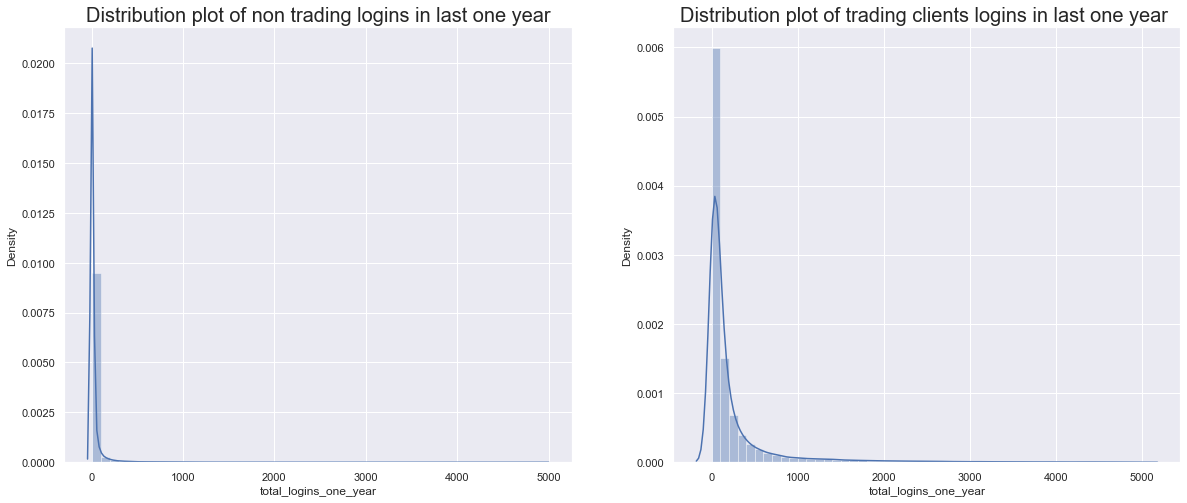

In [7]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(df_model[df_model["total_logins_one_year"] < 5000][df_model["target"] == 0]["total_logins_one_year"], ax=axs[0]).set_title("Distribution plot of non trading logins in last one year",  fontsize=20)
sns.distplot(df_model[df_model["total_logins_one_year"] < 5000][df_model["target"] == 1]["total_logins_one_year"], ax=axs[1]).set_title("Distribution plot of trading clients logins in last one year ",  fontsize=20)

Text(0.5, 1.0, 'Distribution plot of trading clients trades in last one year ')

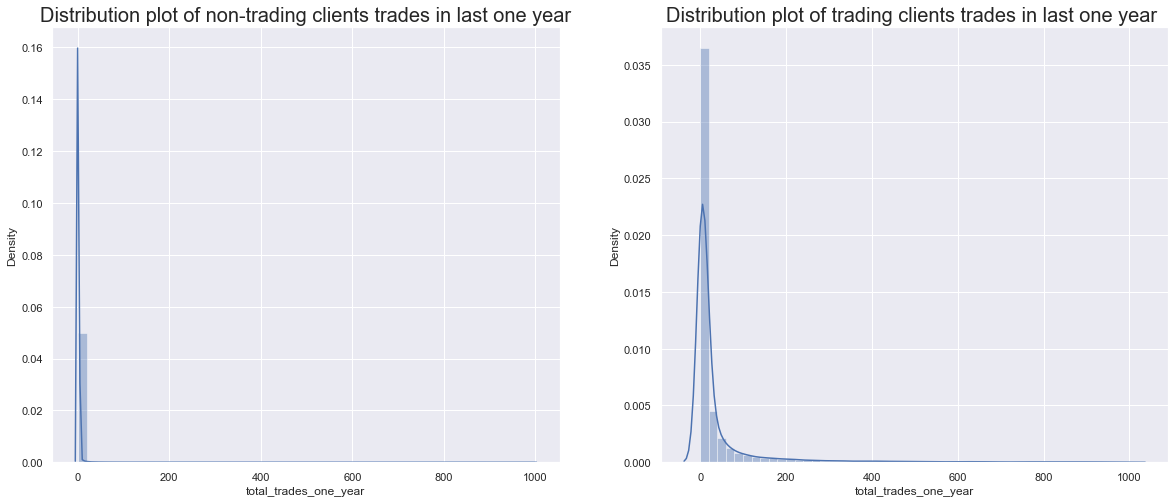

In [8]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(df_model[df_model["total_trades_one_year"] < 1000][df_model["target"] == 0]["total_trades_one_year"], 
             ax=axs[0]).set_title("Distribution plot of non-trading clients trades in last one year",  fontsize=20)
sns.distplot(df_model[df_model["total_trades_one_year"] < 1000][df_model["target"] == 1]["total_trades_one_year"], 
             ax=axs[1]).set_title("Distribution plot of trading clients trades in last one year ",  fontsize=20)

Text(0.5, 1.0, 'Distribution plot of trading clients months since last trade in last one year ')

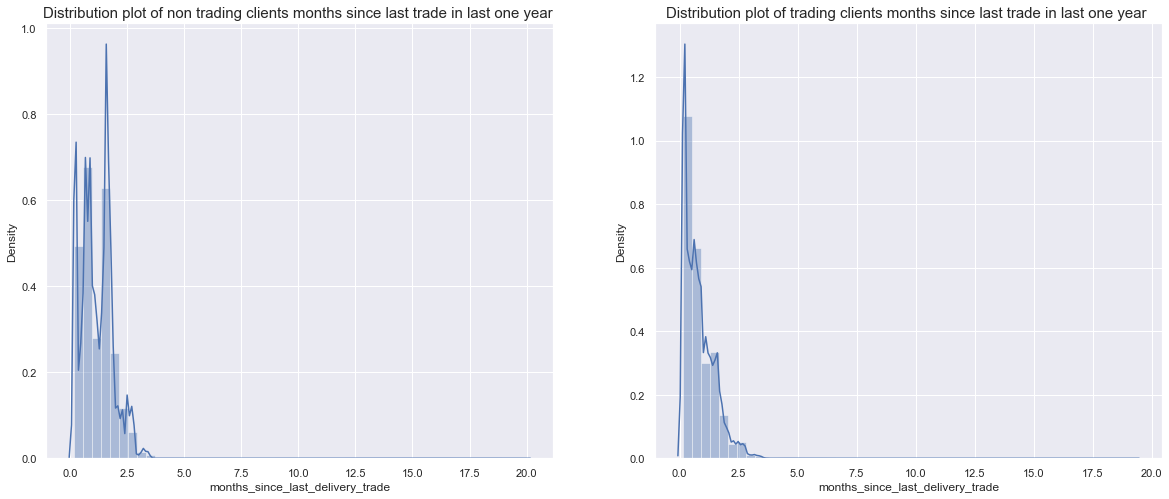

In [9]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(df_model[(df_model["target"] == 0) & (df_model["months_since_last_delivery_trade"] < 20)]["months_since_last_delivery_trade"], 
            ax=axs[0]).set_title("Distribution plot of non trading clients months since last trade in last one year ",  fontsize=15)
sns.distplot(df_model[(df_model["target"] == 1) & (df_model["months_since_last_delivery_trade"] < 20)]["months_since_last_delivery_trade"], 
            ax=axs[1]).set_title("Distribution plot of trading clients months since last trade in last one year ",  fontsize=15)


In [10]:
print("mean of number of trades in one year by clients trading post etf: {}".format(df_model[df_model["target"] == 1]["total_trades_one_year"].median()))
print("mean of number of trades in one year by clients not trading post etf: {}".format(df_model[df_model["target"] == 0]["total_trades_one_year"].mean()))

mean of number of trades in one year by clients trading post etf: 6.0
mean of number of trades in one year by clients not trading post etf: 4.029453655279848


In [45]:
print("Clients who were trading in last one year: {}".format(len(df_model[df_model["total_logins_one_year"] > 1])))

Clients who were trading in last one year: 216605


In [8]:
df_model[(df_model["total_trades_one_year"] < 5) & (df_model["target"] == 0) & (df_model["months_since_last_login"] < 1)].to_csv("../results/clients_less_than_5_trades__not_trading_post_etf__logged_in_last_month.csv")

In [32]:
df_model.columns

Index(['Unnamed: 0', 'client_code', 'KRA YN', 'IsKarvy', 'cm_sex', 'IncomePA',
       'IsDormant', 'E2Channel', 'target', 'age', 'months_since_last_login',
       'months_since_last_futures_trade', 'months_since_last_options_trade',
       'months_since_last_intraday_trade', 'months_since_last_delivery_trade',
       'THV', 'ALB', 'Z20', 'total_logins_one_year', 'total_trades_one_year'],
      dtype='object')